In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import cv2, json, os
import pylab
from sklearn.model_selection import train_test_split,KFold
from sklearn import neighbors,metrics
import tensorflow as tf
import skimage.measure as ski
pylab.rcParams['figure.figsize'] = (15.0, 15.0)

## 读取数据

In [2]:
with open('./new_labels.json','r') as f:
    labels = json.load(f)
# x_file = ['train/'+f for f in os.listdir('./train')]
# iter = 0

FileNotFoundError: [Errno 2] No such file or directory: './new_labels.json'

In [4]:
i=0

## 数据预处理
### 二值化、去噪声、分割

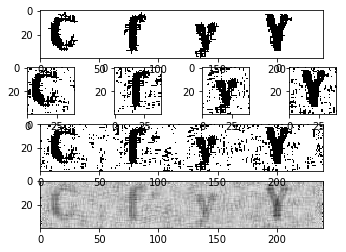

In [5]:
def removeContour(img_t, inter):
    img_t = 1-img_t
    lbs = ski.label(img_t,connectivity=1,background=False)
    for e in np.unique(lbs):
        count = list(lbs.flatten()).count(e)
        if  count < inter or e == 0:
            img_t[lbs==e] = 255
        else:
            img_t[lbs==e] = 0
    return img_t

# i+=1
w = 40
file = os.listdir('./train/')
img = cv2.imread('train/'+file[i])
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# img = np.apply_over_axes(axes=2,func=np.min,a=img)
img = np.reshape(img,(img.shape[0],-1))
img = img[3:43]
fg = plt.figure()
fg.add_subplot(414)
plt.imshow(img,cmap='gray')
# img = cv2.blur(img,(3,3))
# img = cv2.blur(img,(2,2))
ret,img = cv2.threshold(img,0,1,cv2.THRESH_OTSU)
# img = cv2.blur(img,(2,2))

fg.add_subplot(413)
plt.imshow(img,cmap='gray')
fg.add_subplot(445)
plt.imshow(img[:,5:5+w],cmap='gray')
fg.add_subplot(446)
plt.imshow(img[:,60:60+w],cmap='gray')
fg.add_subplot(447)
plt.imshow(img[:,120:120+w],cmap='gray')
fg.add_subplot(448)
plt.imshow(img[:,180:180+w],cmap='gray')
fg.add_subplot(411)
plt.imshow(removeContour(img,30),cmap='gray')

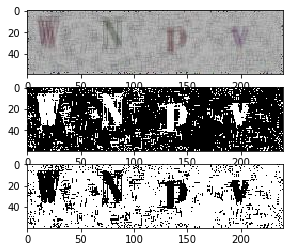

In [132]:
i+=1
file = os.listdir('./train/')
img = cv2.imread('train/'+file[i])
fg = plt.figure()
fg.add_subplot(311)
plt.imshow(img)
hls = cv2.cvtColor(img,cv2.COLOR_RGB2HLS)
inr = cv2.inRange(hls,(0,0,0),(255,155,255))
fg.add_subplot(312)
plt.imshow(inr,cmap='gray')
fg.add_subplot(313)
gr = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
RET,grl = cv2.threshold(gr,155,255,cv2.THRESH_BINARY)
plt.imshow(grl,cmap='gray')


In [133]:
gr/255

array([[0.72941176, 0.69019608, 0.21960784, ..., 0.74117647, 0.61960784,
        0.73333333],
       [0.70588235, 0.70196078, 0.74901961, ..., 0.70588235, 0.74509804,
        0.68627451],
       [0.69019608, 0.74509804, 0.62352941, ..., 0.6627451 , 0.73333333,
        0.71372549],
       ...,
       [0.70196078, 0.69803922, 0.6627451 , ..., 0.6627451 , 0.6745098 ,
        0.23529412],
       [0.69803922, 0.69019608, 0.70196078, ..., 0.77254902, 0.7254902 ,
        0.65882353],
       [0.70980392, 0.69019608, 0.72941176, ..., 0.28627451, 0.6627451 ,
        0.76862745]])

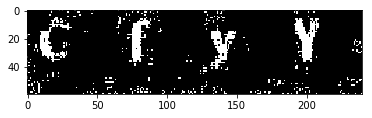